In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## 2a. Read lease data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load from CSV
df = pd.read_csv('/content/SPE_lease_data.csv')

df.head(5)

,Lease,Well Number,State,Formation/Reservoir,Initial Pressure Estimate (psi),Reservoir Temperature (deg F),Net Pay (ft),Wellbore Diameter (ft),Porosity,Water Saturation,...,Pressure Loss Correlation.4,Tubing ID (in) .4,Tubing OD (in) .4,Tubing Depth (ft) .4,Casing ID 1 (in) .4,Casing Footage 1 (ft) .4,Casing ID 2 (in) .4,Casing Footage 2 (ft) .4,Casing Depth (ft) .4,Description
0,OSPREY,1,TX,EAGLE FORD,5400,225,78,0.7,0.063,0.260,...,Beggs & Brill,2.441,2.875,6764.0,4.67,6941.0,2.992,6307.0,13248.0,Well began producing and was later recomplete...
1,FALCON,2,TX,EAGLE FORD,5700,225,66,0.7,0.063,0.270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Interior well on a 3-well pad that was shut-i...
2,HAWK,3,TX,EAGLE FORD,5650,225,67,0.7,0.063,0.271,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Exterior well on a 3-well pad that was shut-i...
3,EAGLE,4,TX,EAGLE FORD,5000,235,74,0.7,0.063,0.270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Single unbounded well with modern completion ...
4,KITE,5,TX,EAGLE FORD,5000,238,56,0.7,0.050,0.321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Child well with modern completion design offs...


In [ ]:
df['Formation/Reservoir'].unique()

array(['EAGLE FORD', 'HAYNESVILLE SHALE', 'BOSSIER SHALE ', 'MARCELLUS',
       'MARCELLUS - UPPER'], dtype=object)

In [ ]:
df[df['Formation/Reservoir']=='BOSSIER SHALE ']['Lease'].unique()

array(['CUCKOO'], dtype=object)

In [ ]:
df.columns

Index(['Lease', 'Well Number', 'State', 'Formation/Reservoir',
       ' Initial Pressure Estimate (psi) ', ' Reservoir Temperature (deg F) ',
       ' Net Pay (ft) ', ' Wellbore Diameter (ft) ', 'Porosity',
       ' Water Saturation ', ' Oil Saturation ', ' Gas Saturation ',
       ' Gas Specific Gravity ', 'CO2', ' H2S ', 'N2',
       'Condensate Yield (Bc/MMcf)', 'Condensate Gravity (API)',
       ' Dew Point Pressure (psi) ', 'Sep. Temperature (deg F)',
       'Sep. Pressure (psi)', ' Oil Gravity (API) ', ' Initial GOR (scf/bbl) ',
       ' Bubble Point Pressure (psi) ', ' TVD (ft) ', ' Spacing ', '# Stages',
       '# Clusters ', '# Clusters per Stage', 'Pre-Refrac Completion # Stages',
       'Pre-Refrac Completion # Clusters ',
       'Initian Completion # Clusters per Stage', '# of Total Proppant (Lbs)',
       'Total Fluid (Bbls)', ' Lateral Length (ft) ', ' Top Perf (ft) ',
       ' Bottom Perf (ft) ', ' Sandface Temp (deg F) ',
       ' Static Wellhead Temp (deg F) ', ' Confi

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Well Number,53.0,39.113208,2.310067e+01,1.000,25.000,38.000,63.000,76.000
Initial Pressure Estimate (psi),53.0,6274.320755,2.881390e+03,2200.000,4300.000,5200.000,9900.000,12223.000
Reservoir Temperature (deg F),53.0,211.867925,9.074331e+01,115.000,134.000,146.000,305.000,379.000
Net Pay (ft),53.0,157.830189,5.968660e+01,56.000,134.000,164.000,208.000,268.000
Wellbore Diameter (ft),53.0,0.700000,1.120847e-16,0.700,0.700,0.700,0.700,0.700
...,...,...,...,...,...,...,...,...
Casing ID 1 (in) .4,1.0,4.670000,NaN,4.670,4.670,4.670,4.670,4.670
Casing Footage 1 (ft) .4,1.0,6941.000000,NaN,6941.000,6941.000,6941.000,6941.000,6941.000
Casing ID 2 (in) .4,1.0,2.992000,NaN,2.992,2.992,2.992,2.992,2.992
Casing Footage 2 (ft) .4,1.0,6307.000000,NaN,6307.000,6307.000,6307.000,6307.000,6307.000


In [ ]:
df['Formation/Reservoir'].unique()

array(['EAGLE FORD', 'HAYNESVILLE SHALE', 'BOSSIER SHALE ', 'MARCELLUS',
       'MARCELLUS - UPPER'], dtype=object)

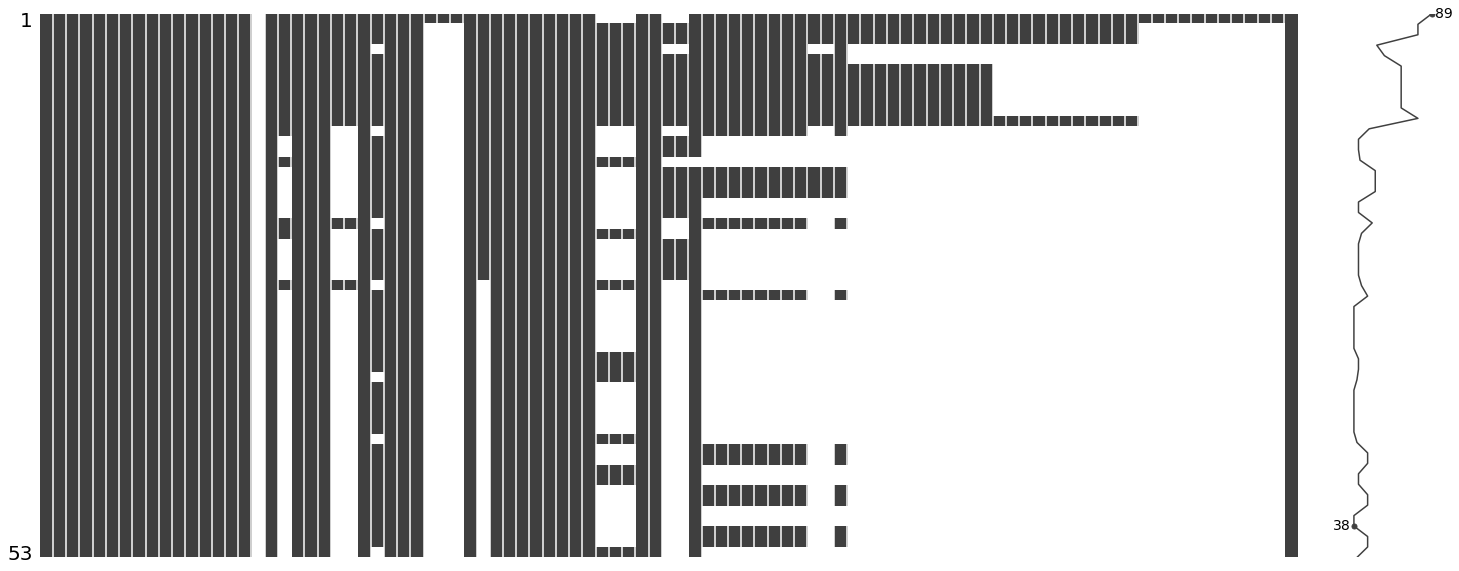

In [ ]:
msno.matrix(df)

In [ ]:
# Pie diagram for respective states
df['Formation/Reservoir'].value_counts()

MARCELLUS - UPPER    16
HAYNESVILLE SHALE    14
EAGLE FORD           11
MARCELLUS            11
BOSSIER SHALE         1
Name: Formation/Reservoir, dtype: int64

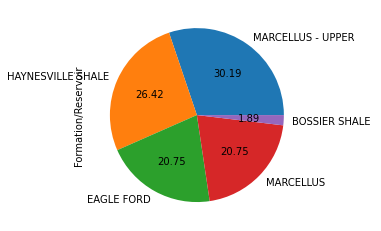

In [ ]:
df['Formation/Reservoir'].value_counts().plot(kind='pie', autopct='%.2f')

Text(0.5, 1.0, 'Bar Chart')

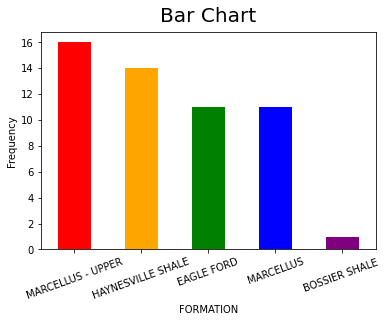

In [ ]:
colors = ['red', 'orange', 'green', 'blue', 'purple']

df['Formation/Reservoir'].value_counts().plot(kind='bar', color=colors, rot=20)
plt.xlabel('FORMATION')
plt.ylabel('Frequency')
plt.title('Bar Chart', size=20, pad=10)

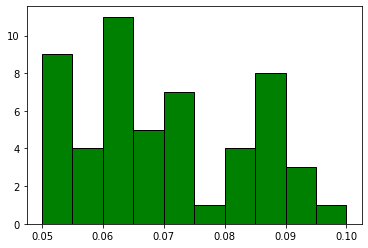

In [ ]:
# Distribution of porosity
plt.hist(df['Porosity'], bins=10, lw=1, edgecolor='k', color='green')
# plt.grid()
plt.show()

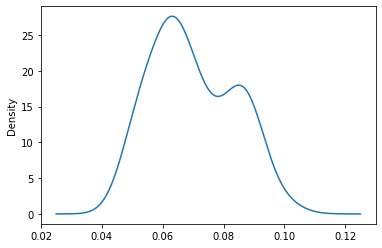

In [ ]:
# Kernel density estimation (KDE)
df['Porosity'].plot(kind='kde')

/tmp/ipython-input-67-4016236174.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Formation/Reservoir', y='Porosity', data=df, palette='viridis')


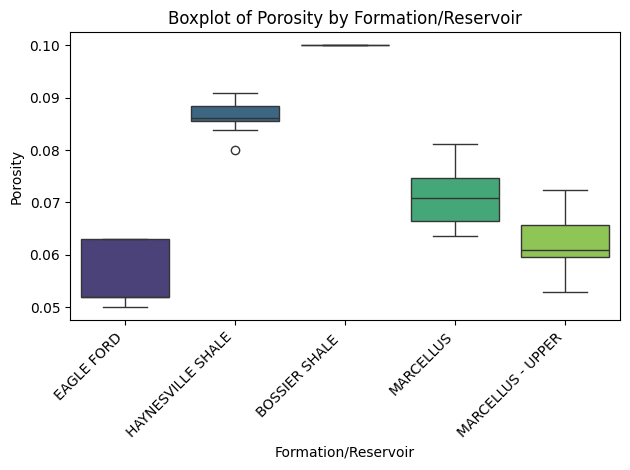

In [ ]:
# prompt: create boxplot with column 'Formation/Reservoir' for 'Porosity' value with different colour

import matplotlib.pyplot as plt

sns.boxplot(x='Formation/Reservoir', y='Porosity', data=df, palette='viridis')
plt.title('Boxplot of Porosity by Formation/Reservoir')
plt.xlabel('Formation/Reservoir')
plt.ylabel('Porosity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['Lease', 'Time (Days)', 'Choke Size', 'Gas Volume (MMscf)',
       'Oil Volume (stb)', 'Water Volume  (stb)',
       'Gas Lift Inj Volume  (MMscf)', 'Casing Pressure  (psi(a))',
       'Tubing Pressure  (psi(a))', 'Active Pressure  (psi(a))',
       'Line Pressure  (psi(a))', 'Pressure Source ',
       'Calculated Sandface Pressure  (psi(a))'],
      dtype='object')

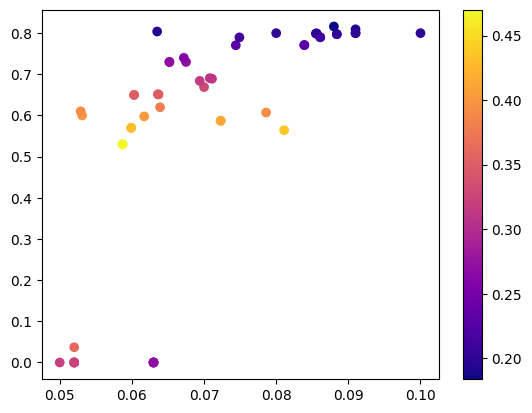

In [ ]:
# Crossplot porosity and Sg
plt.scatter(df['Porosity'], df[' Gas Saturation '], c=df[' Water Saturation '],
            cmap='plasma')
plt.colorbar()
plt.show()

## 2b. Exploratory analysis (correlation)

<Axes: >

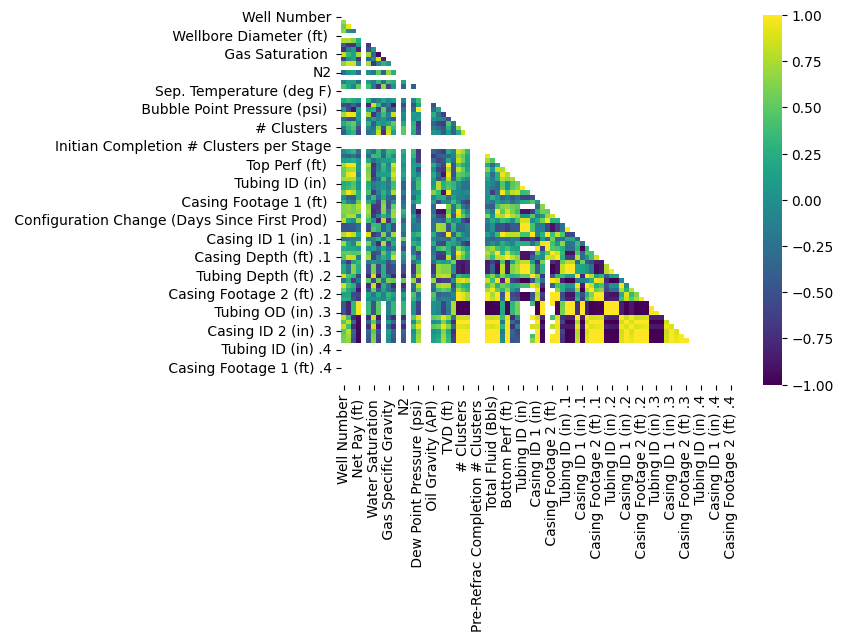

In [ ]:
# Correlation matrix
corr_matrix = df.select_dtypes(include=np.number).corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Visualize
sns.heatmap(corr_matrix, mask=mask, cmap='viridis', annot=False)

## 2c. Groupby

Task 1: List top 10 lease which has the highest porosity

In [ ]:
# Sort values
top5 = df.sort_values('Porosity', ascending=False).head(10)

top5

,Lease,Well Number,State,Formation/Reservoir,Initial Pressure Estimate (psi),Reservoir Temperature (deg F),Net Pay (ft),Wellbore Diameter (ft),Porosity,Water Saturation,...,Pressure Loss Correlation.4,Tubing ID (in) .4,Tubing OD (in) .4,Tubing Depth (ft) .4,Casing ID 1 (in) .4,Casing Footage 1 (ft) .4,Casing ID 2 (in) .4,Casing Footage 2 (ft) .4,Casing Depth (ft) .4,Description
20,CUCKOO,71,LA,BOSSIER SHALE,10500,305,150,0.7,0.1000,0.2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SNG; Bossier well
18,BEE-EATER,69,LA,HAYNESVILLE SHALE,10000,379,165,0.7,0.0910,0.2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CCD; Modern completion comparison for twin pa...
14,CASSOWARY,65,LA,HAYNESVILLE SHALE,12223,331,161,0.7,0.0910,0.1907,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PDB; CLS parent later offset by modern comple...
19,LOON,70,LA,HAYNESVILLE SHALE,10000,379,165,0.7,0.0910,0.2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLS; Wider CS & increase #/cl completion test
12,MYNAH,63,LA,HAYNESVILLE SHALE,9800,351,208,0.7,0.0884,0.2025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CCD; Modern completions infilled between lega...
13,PARTRIDGE,64,LA,HAYNESVILLE SHALE,9900,351,209,0.7,0.0884,0.2025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CCD; Modern completions infilled between lega...
11,LORIKEET,62,LA,HAYNESVILLE SHALE,9939,285,268,0.7,0.0880,0.1838,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SNG; Unbounded legacy well
23,TERN,74,LA,HAYNESVILLE SHALE,10450,329,193,0.7,0.0861,0.2100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CCD; Modern completions infilled between lega...
22,ARCHAEOPTERYX,73,LA,HAYNESVILLE SHALE,10300,343,183,0.7,0.0861,0.2100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CCD; Modern completions infilled between lega...
17,HARPY,68,LA,HAYNESVILLE SHALE,11325,343,166,0.7,0.0856,0.2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CCD; Modern 3 well development infilled betwe...


In [ ]:
top5['Lease'].unique()

array(['CUCKOO', 'LOON', 'BEE-EATER', 'CASSOWARY', 'PARTRIDGE'],
      dtype=object)

Task 2: List 10 most oil saturated lease

In [ ]:
# Sort values
df.sort_values(' Oil Saturation ', ascending=False).head(10)

,Lease,Well Number,State,Formation/Reservoir,Initial Pressure Estimate (psi),Reservoir Temperature (deg F),Net Pay (ft),Wellbore Diameter (ft),Porosity,Water Saturation,Oil Saturation,Gas Saturation,Gas Specific Gravity,CO2,H2S,N2,Condensate Yield (Bc/MMcf),Condensate Gravity (API),Dew Point Pressure (psi),Sep. Temperature (deg F),Sep. Pressure (psi),Oil Gravity (API),Initial GOR (scf/bbl),Bubble Point Pressure (psi),TVD (ft),Spacing,# Stages,# Clusters,# Clusters per Stage,Pre-Refrac Completion # Stages,Pre-Refrac Completion # Clusters,Initian Completion # Clusters per Stage,# of Total Proppant (Lbs),Total Fluid (Bbls),Lateral Length (ft),Top Perf (ft),Bottom Perf (ft),Sandface Temp (deg F),Static Wellhead Temp (deg F),Configuration,...,Tubing Depth (ft) .1,Casing ID 1 (in) .1,Casing Footage 1 (ft) .1,Casing ID 2 (in) .1,Casing Footage 2 (ft) .1,Casing Depth (ft) .1,Configuration Change (Days Since First Prod) .1,Production Path.2,Pressure Loss Correlation.2,Tubing ID (in) .2,Tubing OD (in) .2,Tubing Depth (ft) .2,Casing ID 1 (in) .2,Casing Footage 1 (ft) .2,Casing ID 2 (in) .2,Casing Footage 2 (ft) .2,Casing Depth (ft) .2,Configuration Change (Days Since First Prod) .2,Production Path.3,Pressure Loss Correlation.3,Tubing ID (in) .3,Tubing OD (in) .3,Tubing Depth (ft) .3,Casing ID 1 (in) .3,Casing Footage 1 (ft) .3,Casing ID 2 (in) .3,Casing Footage 2 (ft) .3,Casing Depth (ft) .3,Configuration Change (Days Since First Prod) .3,Production Path.4,Pressure Loss Correlation.4,Tubing ID (in) .4,Tubing OD (in) .4,Tubing Depth (ft) .4,Casing ID 1 (in) .4,Casing Footage 1 (ft) .4,Casing ID 2 (in) .4,Casing Footage 2 (ft) .4,Casing Depth (ft) .4,Description
0,OSPREY,1,TX,EAGLE FORD,5400,225,78,0.7,0.063,0.260,0.740,0.0,0.9513,0.0217,0.0,0.0045,NaN,37.29,1211.0,100,100,37.29,335.72,1211.0,7638.6000,1400.0,28,252,9.0,20.0,60.0,3.0,13514540.0,275579.0,5883,8030,13913,225.0,70.0,Initial Config,...,7022.0,6.276,7029.0,4.000,6936.0,13965.0,1101.0,Tubing,Beggs & Brill,2.441,2.875,6764.0,4.670,6941.0,2.992,6307.0,13248.0,1302.0,Gas Lift,Beggs & Brill,2.441,2.875,6825.0,4.670,6941.0,2.992,6307.0,13248.0,1602.0,Pumping,Beggs & Brill,2.441,2.875,6764.0,4.67,6941.0,2.992,6307.0,13248.0,Well began producing and was later recomplete...
1,FALCON,2,TX,EAGLE FORD,5700,225,66,0.7,0.063,0.270,0.730,0.0,0.9936,0.0217,0.0,0.0045,NaN,34.60,1370.0,100,100,34.60,275.00,1370.0,7501.8758,1000.0,64,960,15.0,NaN,NaN,NaN,35970960.0,559202.0,9997,7828,17825,225.0,60.0,Initial Config,...,7595.0,4.778,7499.0,4.276,10541.0,18040.0,123.0,Tubing,Beggs & Brill,1.995,2.375,7595.0,4.778,7499.0,4.276,10541.0,18040.0,196.0,Gas Lift,Beggs & Brill,1.995,2.375,7595.0,4.778,7499.0,4.276,10541.0,18040.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Interior well on a 3-well pad that was shut-i...
3,EAGLE,4,TX,EAGLE FORD,5000,235,74,0.7,0.063,0.270,0.730,0.0,0.9200,0.0204,0.0,0.0019,NaN,35.46,2122.0,100,100,35.46,557.90,2122.0,7890.8100,NaN,50,450,9.0,NaN,NaN,NaN,25267400.0,577003.0,7481,7958,15439,234.0,60.0,Initial Config,...,7500.0,4.778,15493.0,NaN,NaN,15493.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Single unbounded well with modern completion ...
2,HAWK,3,TX,EAGLE FORD,5650,225,67,0.7,0.063,0.271,0.729,0.0,0.9936,0.0217,0.0,0.0045,NaN,34.60,1370.0,100,100,34.60,275.00,1370.0,7516.6753,1000.0,68,1020,15.0,NaN,NaN,NaN,38064782.0,596128.0,10672,7824,18496,225.0,60.0,Initial Config,...,7325.0,4.778,7549.0,4.276,11060.0,18609.0,125.0,Tubing,Beggs & Brill,1.995,2.375,7325.0,4.778,7549.0,4.276,11060.0,18609.0,233.0,Gas Lift,Beggs & Brill,1.995,2.375,7325.0,4.778,7549.0,4.276,11060.0,18609.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Exterior well on a 3-well pad that was shut-i...
4,KITE,5,TX,EAGLE FORD,5000,238,56,0.7,0.050,0.321,0.679,0.0,0.7200,0.0000,0.0,0.0000,NaN,43.58,3064.0,100,100,43.58,1034.70,3064.0,8846.8300,1400.0,34,306,9.0,NaN,NaN,NaN,18554774.0,360202.0,5086,9388,14474,235.0,6

In [ ]:
# Sort values
df.sort_values(' Gas Saturation ', ascending=False).head(10)

,Lease,Well Number,State,Formation/Reservoir,Initial Pressure Estimate (psi),Reservoir Temperature (deg F),Net Pay (ft),Wellbore Diameter (ft),Porosity,Water Saturation,Oil Saturation,Gas Saturation,Gas Specific Gravity,CO2,H2S,N2,Condensate Yield (Bc/MMcf),Condensate Gravity (API),Dew Point Pressure (psi),Sep. Temperature (deg F),Sep. Pressure (psi),Oil Gravity (API),Initial GOR (scf/bbl),Bubble Point Pressure (psi),TVD (ft),Spacing,# Stages,# Clusters,# Clusters per Stage,Pre-Refrac Completion # Stages,Pre-Refrac Completion # Clusters,Initian Completion # Clusters per Stage,# of Total Proppant (Lbs),Total Fluid (Bbls),Lateral Length (ft),Top Perf (ft),Bottom Perf (ft),Sandface Temp (deg F),Static Wellhead Temp (deg F),Configuration,...,Tubing Depth (ft) .1,Casing ID 1 (in) .1,Casing Footage 1 (ft) .1,Casing ID 2 (in) .1,Casing Footage 2 (ft) .1,Casing Depth (ft) .1,Configuration Change (Days Since First Prod) .1,Production Path.2,Pressure Loss Correlation.2,Tubing ID (in) .2,Tubing OD (in) .2,Tubing Depth (ft) .2,Casing ID 1 (in) .2,Casing Footage 1 (ft) .2,Casing ID 2 (in) .2,Casing Footage 2 (ft) .2,Casing Depth (ft) .2,Configuration Change (Days Since First Prod) .2,Production Path.3,Pressure Loss Correlation.3,Tubing ID (in) .3,Tubing OD (in) .3,Tubing Depth (ft) .3,Casing ID 1 (in) .3,Casing Footage 1 (ft) .3,Casing ID 2 (in) .3,Casing Footage 2 (ft) .3,Casing Depth (ft) .3,Configuration Change (Days Since First Prod) .3,Production Path.4,Pressure Loss Correlation.4,Tubing ID (in) .4,Tubing OD (in) .4,Tubing Depth (ft) .4,Casing ID 1 (in) .4,Casing Footage 1 (ft) .4,Casing ID 2 (in) .4,Casing Footage 2 (ft) .4,Casing Depth (ft) .4,Description
11,LORIKEET,62,LA,HAYNESVILLE SHALE,9939,285,268,0.7,0.0880,0.1838,0.0,0.8162,0.580,0.0002,0.0,0.0000,NaN,30.0,9893.0,100,100,13321.8,NaN,NaN,11258.85400,NaN,10,69,7.0,NaN,NaN,NaN,3591544.0,77278.0,4496,11253,15749,285.21375,120.0,Initial Config,...,11225.0,4.670,15800.0,NaN,NaN,15800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SNG; Unbounded legacy well
14,CASSOWARY,65,LA,HAYNESVILLE SHALE,12223,331,161,0.7,0.0910,0.1907,0.0,0.8093,0.580,0.0366,0.0,0.0000,NaN,30.0,9800.0,100,100,21274.3,NaN,NaN,12162.94100,1300.0,8,104,8.0,NaN,NaN,NaN,6134650.0,144387.0,4185,12374,16559,331.23190,120.0,Initial Config,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PDB; CLS parent later offset by modern comple...
27,EMU,24,PA,MARCELLUS,5531,143,132,0.7,0.0635,0.1960,0.0,0.8040,0.570,0.0000,0.0,0.0000,NaN,30.0,NaN,100,100,30.0,NaN,NaN,8489.07000,1850.0,41,123,3.0,NaN,NaN,NaN,18404917.0,NaN,6098,8547,14645,143.36660,60.0,Initial Config,...,8574.0,4.778,14664.0,NaN,NaN,14664.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLUSTER BOUND; Modern Completion design
21,ROOSTER,72,LA,HAYNESVILLE SHALE,10500,350,180,0.7,0.0800,0.2000,0.0,0.8000,0.612,0.0580,0.0,0.0000,NaN,30.0,10500.0,100,100,30.0,NaN,NaN,12668.00000,1250.0,47,235,5.0,NaN,NaN,NaN,26632739.0,530797.0,5235,13153,18388,350.00000,120.0,Initial Config,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CLS; Increase #/cl completion test
20,CUCKOO,71,LA,BOSSIER SHALE,10500,305,150,0.7,0.1000,0.2000,0.0,0.8000,0.605,0.0500,0.0,0.0000,NaN,60.0,10.0,100,100,60.0,0.0,10.0,12064.00000,NaN,89,445,5.0,NaN,NaN,NaN,42946954.0,697775.0,9764,12441,22205,305.00000,120.0,Initial Config,...,12577.0,4.548,22313.0,NaN,NaN,22313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SNG; Bossier well
19,LOON,70,LA,HAYNESVILLE SHALE,10000,379,165,0.7,0.0910,0.2000,0.0,0.8000,0.589,0.0338,0.0,0.0009,

Task 3: List top 5 thickest net pay in Pennsylvania (PA)

In [ ]:
# Do masking
PA_df = df[df['State']=='PA']

# Sort values
PA_df.sort_values(' Net Pay (ft) ', ascending=False).head(5)

,Lease,Well Number,State,Formation/Reservoir,Initial Pressure Estimate (psi),Reservoir Temperature (deg F),Net Pay (ft),Wellbore Diameter (ft),Porosity,Water Saturation,Oil Saturation,Gas Saturation,Gas Specific Gravity,CO2,H2S,N2,Condensate Yield (Bc/MMcf),Condensate Gravity (API),Dew Point Pressure (psi),Sep. Temperature (deg F),Sep. Pressure (psi),Oil Gravity (API),Initial GOR (scf/bbl),Bubble Point Pressure (psi),TVD (ft),Spacing,# Stages,# Clusters,# Clusters per Stage,Pre-Refrac Completion # Stages,Pre-Refrac Completion # Clusters,Initian Completion # Clusters per Stage,# of Total Proppant (Lbs),Total Fluid (Bbls),Lateral Length (ft),Top Perf (ft),Bottom Perf (ft),Sandface Temp (deg F),Static Wellhead Temp (deg F),Configuration,...,Tubing Depth (ft) .1,Casing ID 1 (in) .1,Casing Footage 1 (ft) .1,Casing ID 2 (in) .1,Casing Footage 2 (ft) .1,Casing Depth (ft) .1,Configuration Change (Days Since First Prod) .1,Production Path.2,Pressure Loss Correlation.2,Tubing ID (in) .2,Tubing OD (in) .2,Tubing Depth (ft) .2,Casing ID 1 (in) .2,Casing Footage 1 (ft) .2,Casing ID 2 (in) .2,Casing Footage 2 (ft) .2,Casing Depth (ft) .2,Configuration Change (Days Since First Prod) .2,Production Path.3,Pressure Loss Correlation.3,Tubing ID (in) .3,Tubing OD (in) .3,Tubing Depth (ft) .3,Casing ID 1 (in) .3,Casing Footage 1 (ft) .3,Casing ID 2 (in) .3,Casing Footage 2 (ft) .3,Casing Depth (ft) .3,Configuration Change (Days Since First Prod) .3,Production Path.4,Pressure Loss Correlation.4,Tubing ID (in) .4,Tubing OD (in) .4,Tubing Depth (ft) .4,Casing ID 1 (in) .4,Casing Footage 1 (ft) .4,Casing ID 2 (in) .4,Casing Footage 2 (ft) .4,Casing Depth (ft) .4,Description
43,OWL,40,PA,MARCELLUS - UPPER,2200,136,246,0.7,0.0529,0.39,0.0,0.61,0.57,0.0000,0.0,0.0000,NaN,30.0,NaN,100,100,30.0,NaN,NaN,7588.21,1200.0,27,135,5.0,NaN,NaN,NaN,14163366.0,NaN,6701,7786,14487,136.0,60.0,Initial Config,...,7868.20,4.778,14504.0,NaN,NaN,14504.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1200' innerwell unbounded exterior
42,PELICAN,39,PA,MARCELLUS - UPPER,2500,136,245,0.7,0.0531,0.40,0.0,0.60,0.57,0.0000,0.0,0.0000,NaN,30.0,NaN,100,100,30.0,NaN,NaN,7599.22,1200.0,26,130,5.0,NaN,NaN,NaN,13662881.0,NaN,6415,7794,14209,136.0,60.0,Initial Config,...,7656.90,4.778,14226.0,NaN,NaN,14226.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1200' innerwell unbounded exterior
47,CANARY,44,PA,MARCELLUS - UPPER,4300,133,241,0.7,0.0603,0.35,0.0,0.65,0.57,0.0002,0.0,0.0024,NaN,30.0,NaN,100,100,30.0,NaN,NaN,7521.98,1500.0,46,185,4.0,NaN,NaN,NaN,25367923.0,NaN,6607,7869,14476,133.0,80.0,Initial Config,...,6724.50,4.778,14491.0,NaN,NaN,14491.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500' innerwell unbounded exterior
46,BLUEBIRD,43,PA,MARCELLUS - UPPER,4200,125,241,0.7,0.0603,0.35,0.0,0.65,0.57,0.0000,0.0,0.0000,NaN,30.0,NaN,100,100,30.0,NaN,NaN,7503.32,1500.0,49,196,4.0,NaN,NaN,NaN,20540377.0,NaN,6818,7319,14137,133.0,80.0,Initial Config,...,7603.86,4.778,14174.0,NaN,NaN,14174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500' innerwell unbounded exterior
40,PENGUIN,37,PA,MARCELLUS - UPPER,3400,125,232,0.7,0.0672,0.26,0.0,0.74,0.57,0.0000,0.0,0.0000,NaN,30.0,NaN,100,100,30.0,NaN,NaN,6944.14,1500.0,52,258,5.0,NaN,NaN,NaN,26695450.0,NaN,12940,7193,20133,125.0,60.0,Initial Config,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500' innerwell unbounded exterior


Task 4: Group by each formation, calculate the average of Porosity and Oil Saturation

In [ ]:
df.groupby('Formation/Reservoir')[['Porosity', ' Oil Saturation ']].mean()

,Porosity,Oil Saturation
Formation/Reservoir,,
BOSSIER SHALE,0.100000,0.000000
EAGLE FORD,0.055818,0.682091
HAYNESVILLE SHALE,0.086750,0.000000
MARCELLUS,0.071009,0.000118
MARCELLUS - UPPER,0.062444,0.000000


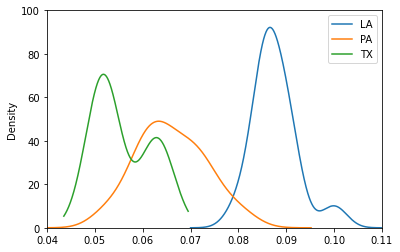

In [ ]:
df.groupby('State')['Porosity'].plot(kind='kde', legend='State')
plt.xlim(0.04, 0.11)
plt.ylim(0, 100)
plt.show()

Task 4: Group by each formation, print the whole summary stats

In [ ]:
df.groupby('Formation/Reservoir')[['Porosity', ' Oil Saturation ']].describe().T

Formation/Reservoir     BOSSIER SHALE   ...  MARCELLUS - UPPER
Porosity         count             1.0  ...          16.000000
                 mean              0.1  ...           0.062444
                 std               NaN  ...           0.005709
                 min               0.1  ...           0.052900
                 25%               0.1  ...           0.059600
                 50%               0.1  ...           0.061000
                 75%               0.1  ...           0.065700
                 max               0.1  ...           0.072300
 Oil Saturation  count             1.0  ...          16.000000
                 mean              0.0  ...           0.000000
                 std               NaN  ...           0.000000
                 min               0.0  ...           0.000000
                 25%               0.0  ...           0.000000
                 50%               0.0  ...           0.000000
                 75%               0.0  ...           0.000000
                 max               0.0  ...           0.000000

[16 rows x 5 columns]

In [ ]:
# Pivoting
pd.pivot_table(df, index=['State', 'Formation/Reservoir'], values=['Porosity', ' Net Pay (ft) '],
               aggfunc=[np.mean, np.std])

mean                      std          
                           Net Pay (ft)   Porosity  Net Pay (ft)   Porosity
State Formation/Reservoir                                                  
LA    BOSSIER SHALE           150.000000  0.100000            NaN       NaN
      HAYNESVILLE SHALE       180.714286  0.086750      31.303548  0.003139
PA    MARCELLUS               138.090909  0.071009      13.974652  0.005954
      MARCELLUS - UPPER       214.687500  0.062444      31.584213  0.005709
TX    EAGLE FORD               66.454545  0.055818       5.888355  0.005724

In [ ]:
def ecdf(data):
    """
    Plot ECDF (Empirical Cumulative Distribution Function)
    """
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n

    plt.scatter(x, y, alpha=0.5)

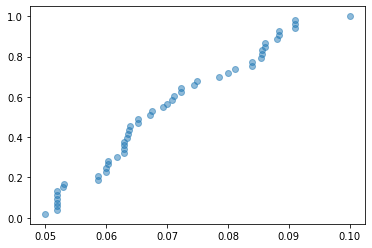

In [ ]:
ecdf(df['Porosity'])

## 2d. Merge and join

In [ ]:
df_production = pd.read_csv('/content/SPE_production_data_with_synthetic.csv')

df_production

,Lease,Time (Days),Choke Size,Gas Volume (MMscf),Oil Volume (stb),Water Volume (stb),Gas Lift Inj Volume (MMscf),Casing Pressure (psi(a)),Tubing Pressure (psi(a)),Active Pressure (psi(a)),Line Pressure (psi(a)),Pressure Source,Calculated Sandface Pressure (psi(a))
0,ALBATROSS,1.0,NaN,0.00000,0.0,422.00,NaN,2435.000,2980.000,2980.000,966.331,Tubing Pressure,6221.699755
1,ALBATROSS,2.0,NaN,3.71700,0.0,695.00,NaN,3256.000,2772.000,2772.000,966.936,Tubing Pressure,4359.409532
2,ALBATROSS,3.0,NaN,8.07600,0.0,893.00,NaN,2775.000,1678.000,1678.000,991.999,Tubing Pressure,3526.820268
3,ALBATROSS,4.0,NaN,6.32928,0.0,684.00,NaN,2843.546,1916.428,1916.428,971.215,Tubing Pressure,3440.197342
4,ALBATROSS,5.0,NaN,4.98449,0.0,541.00,NaN,3326.942,2887.619,2887.619,959.962,Tubing Pressure,4328.422427
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15708,TOUCAN,496.0,NaN,3.23093,0.0,5.79,NaN,858.671,767.673,767.673,740.466,Tubing Pressure,1056.822540
15709,TOUCAN,497.0,NaN,2.50142,0.0,4.69,NaN,857.231,768.191,768.191,743.317,Tubing Pressure,1036.228737
15710,TOUCAN,498.0,NaN,3.18478,0.0,3.39,NaN,895.601,832.234,832.234,771.486,Tubing Pressure,1113.988314
15711,TOUCAN,499.0,NaN,3.03299,0.0,5.60,NaN,870.467,792.709,792.709,767.573,Tubing Pressure,1079.342477


In [ ]:

df_merged = pd.merge(df, df_production, on='Lease')

df_merged[['Lease', 'Formation/Reservoir', ' Reservoir Temperature (deg F) ',
           'Time (Days)', 'Gas Volume (MMscf)']]

,Lease,Formation/Reservoir,Reservoir Temperature (deg F),Time (Days),Gas Volume (MMscf)
0,OSPREY,EAGLE FORD,225,1.0,35.499
1,OSPREY,EAGLE FORD,225,2.0,32.450
2,OSPREY,EAGLE FORD,225,3.0,29.636
3,OSPREY,EAGLE FORD,225,4.0,27.495
4,OSPREY,EAGLE FORD,225,5.0,24.892
...,...,...,...,...,...
15685,GOOSE,MARCELLUS - UPPER,134,2842.0,0.000
15686,GOOSE,MARCELLUS - UPPER,134,2843.0,0.000
15687,GOOSE,MARCELLUS - UPPER,134,2844.0,0.000
15688,GOOSE,MARCELLUS - UPPER,134,2845.0,0.000


In [ ]:
df_merged.columns

Index(['Lease', 'Well Number', 'State', 'Formation/Reservoir',
       ' Initial Pressure Estimate (psi) ', ' Reservoir Temperature (deg F) ',
       ' Net Pay (ft) ', ' Wellbore Diameter (ft) ', 'Porosity',
       ' Water Saturation ',
       ...
       'Gas Volume (MMscf)', 'Oil Volume (stb)', 'Water Volume  (stb)',
       'Gas Lift Inj Volume  (MMscf)', 'Casing Pressure  (psi(a))',
       'Tubing Pressure  (psi(a))', 'Active Pressure  (psi(a))',
       'Line Pressure  (psi(a))', 'Pressure Source ',
       'Calculated Sandface Pressure  (psi(a))'],
      dtype='object', length=107)

In [ ]:
# prompt: pivot df_merged by Formation/Reservoir then sum the Gas Volume (MMscf) then sort from highest

df_pivot = df_merged.pivot_table(index='Formation/Reservoir', values='Gas Volume (MMscf)', aggfunc='sum')
df_pivot = df_pivot.sort_values(by='Gas Volume (MMscf)', ascending=False)

df_pivot


,Gas Volume (MMscf)
Formation/Reservoir,
MARCELLUS - UPPER,83670.19011
EAGLE FORD,1602.16400
BOSSIER SHALE,670.88300


## 2e. Time-series analysis

29 October 2021 -> 2021-10-29, 2021/10/29, 29-Oct-21, 29/10/2021

Pandas -> 2021-10-29

In [ ]:
volve = pd.read_csv('/content/Volve_Production_Data.csv')

volve.head(10)

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,07-Apr-14,15/9-F-1 C,0.0,0.000,0.000,0.000,0.0,0.00000,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
1,08-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,1.00306,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
2,09-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.97901,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
3,10-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.54576,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
4,11-Apr-14,15/9-F-1 C,0.0,310.376,96.876,277.278,0.0,1.21599,33.098,10.480,33.072,0.0,0.0,0.0,NaN,production
5,12-Apr-14,15/9-F-1 C,0.0,303.501,96.923,281.447,0.0,3.08702,22.053,8.704,22.053,0.0,0.0,0.0,NaN,production
6,13-Apr-14,15/9-F-1 C,0.0,303.535,96.959,276.032,0.0,1.96237,27.503,9.423,16.163,0.0,0.0,0.0,NaN,production
7,14-Apr-14,15/9-F-1 C,0.0,303.782,96.969,282.787,0.0,0.00000,20.996,8.131,20.737,0.0,0.0,0.0,NaN,production
8,15-Apr-14,15/9-F-1 C,0.0,303.858,97.021,289.941,0.0,31.14186,13.918,8.498,12.182,0.0,0.0,0.0,NaN,production
9,16-Apr-14,15/9-F-1 C,0.0,303.792,97.066,299.672,0.0,0.00000,4.120,8.821,1.490,0.0,0.0,0.0,NaN,production


In [ ]:
# Convert to Pandas datetime
volve['DATEPRD'] = pd.to_datetime(volve['DATEPRD'], format='%d-%b-%y')

volve.head()

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,2014-04-07,15/9-F-1 C,0.0,0.000,0.000,0.000,0.0,0.00000,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
1,2014-04-08,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,1.00306,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
2,2014-04-09,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.97901,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
3,2014-04-10,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.54576,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
4,2014-04-11,15/9-F-1 C,0.0,310.376,96.876,277.278,0.0,1.21599,33.098,10.48,33.072,0.0,0.0,0.0,NaN,production


Task: Isolate the dataframe from only well 15/9-F-14

In [ ]:
# Do masking
f14 = volve[volve['NPD_WELL_BORE_NAME']=='15/9-F-14'].reset_index(drop=True)

f14

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,2008-02-12,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.059,0.0,0.0,0.0,NaN,production
1,2008-02-13,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.068,0.0,0.0,0.0,NaN,production
2,2008-02-14,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.050,0.0,0.0,0.0,NaN,production
3,2008-02-15,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.066,0.0,0.0,0.0,NaN,production
4,2008-02-16,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.105,0.0,0.0,0.0,NaN,production
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051,2016-09-13,15/9-F-14,0.0,0.0,0.0,10.873,10.583,0.94937,10.873,0.0,8.894,0.0,0.0,0.0,NaN,production
3052,2016-09-14,15/9-F-14,0.0,0.0,0.0,10.877,10.583,1.11452,10.877,0.0,8.888,0.0,0.0,0.0,NaN,production
3053,2016-09-15,15/9-F-14,0.0,0.0,0.0,10.883,10.582,1.00047,10.883,0.0,8.856,0.0,0.0,0.0,NaN,production
3054,2016-09-16,15/9-F-14,0.0,0.0,0.0,10.879,10.583,1.16066,10.879,0.0,8.839,0.0,0.0,0.0,NaN,production


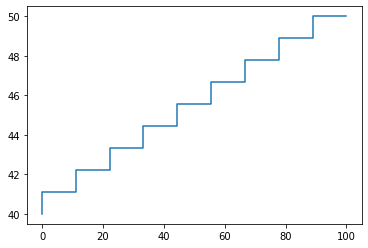

In [ ]:
x = np.linspace(0, 100, 10)
y = np.linspace(40, 50, 10)

plt.step(x, y, where='pre')

In [ ]:
f14.columns

Index(['DATEPRD', 'NPD_WELL_BORE_NAME', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND'],
      dtype='object')

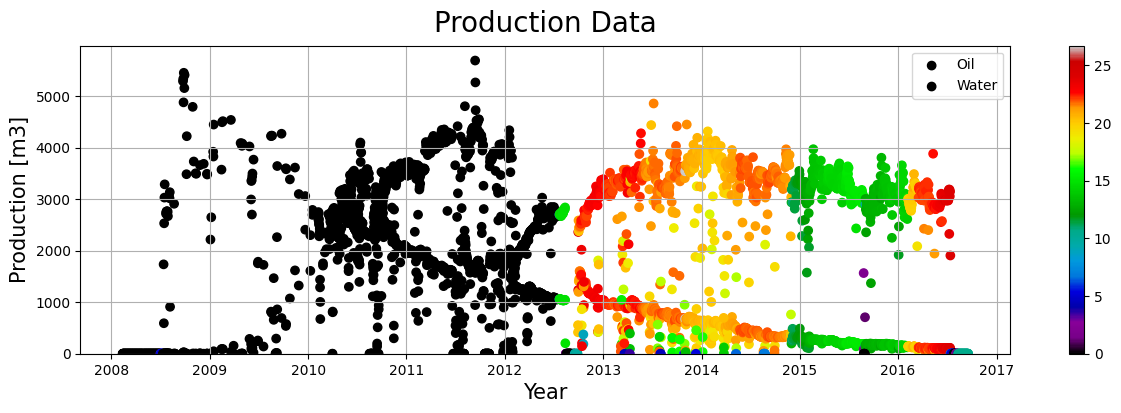

In [ ]:
x = f14['DATEPRD'].values
y = f14['BORE_OIL_VOL'].values
y2 = f14['BORE_WAT_VOL'].values
color = f14['AVG_ANNULUS_PRESS'].values

plt.figure(figsize=(15,4))
plt.scatter(x, y, label='Oil', c=color, cmap='nipy_spectral')
plt.scatter(x, y2, label='Water', c=color, cmap='nipy_spectral')
plt.colorbar()
plt.xlabel('Year', size=15)
plt.ylabel('Production [m3]', size=15)
plt.title('Production Data', size=20, pad=10)
plt.ylim(ymin=0)
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Make it interactive
fig = px.scatter(f14, 'DATEPRD', 'BORE_OIL_VOL', color='AVG_ANNULUS_PRESS')
fig.show()

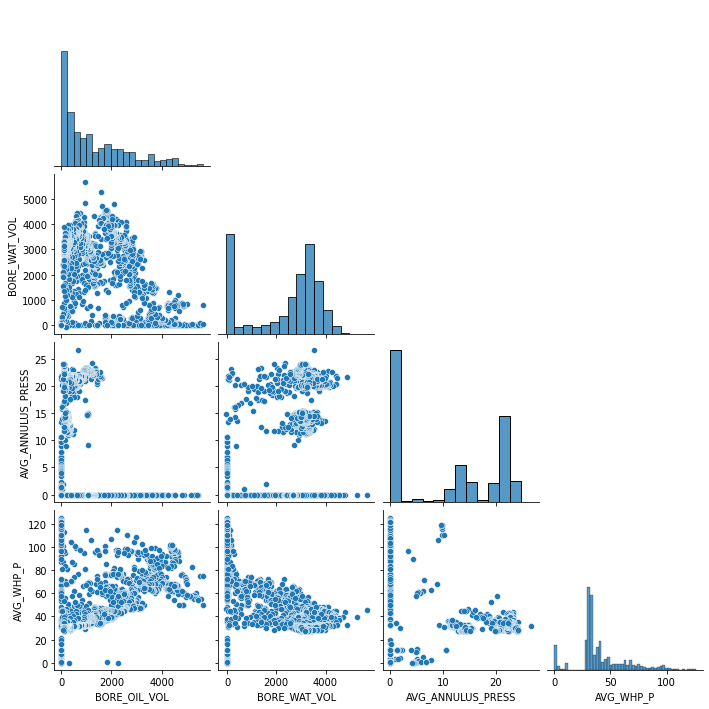

In [ ]:
# Pairplot
variables = ['BORE_OIL_VOL', 'BORE_WAT_VOL', 'AVG_ANNULUS_PRESS', 'AVG_WHP_P']

sns.pairplot(f14, vars=variables, corner=True)

In [ ]:
df_production_marcellus = df_merged[df_merged['Formation/Reservoir']=='MARCELLUS - UPPER']

df_production_marcellus

,Lease,Well Number,State,Formation/Reservoir,Initial Pressure Estimate (psi),Reservoir Temperature (deg F),Net Pay (ft),Wellbore Diameter (ft),Porosity,Water Saturation,...,Gas Volume (MMscf),Oil Volume (stb),Water Volume (stb),Gas Lift Inj Volume (MMscf),Casing Pressure (psi(a)),Tubing Pressure (psi(a)),Active Pressure (psi(a)),Line Pressure (psi(a)),Pressure Source,Calculated Sandface Pressure (psi(a))
145,MACAW,34,PA,MARCELLUS - UPPER,4609,135,164,0.7,0.0652,0.2700,...,1.707,0.0,967.0,NaN,2628.000000,0.000,2628.000000,0.000,Casing Pressure,4593.523017
146,MACAW,34,PA,MARCELLUS - UPPER,4609,135,164,0.7,0.0652,0.2700,...,15.161,0.0,2176.0,NaN,2700.625000,0.000,2700.625000,0.000,Casing Pressure,3879.706556
147,MACAW,34,PA,MARCELLUS - UPPER,4609,135,164,0.7,0.0652,0.2700,...,23.071,0.0,2287.0,NaN,2155.208333,0.000,2155.208333,0.000,Casing Pressure,3129.588406
148,MACAW,34,PA,MARCELLUS - UPPER,4609,135,164,0.7,0.0652,0.2700,...,22.202,0.0,2007.0,NaN,1607.000000,0.000,1607.000000,0.000,Casing Pressure,2408.684468
149,MACAW,34,PA,MARCELLUS - UPPER,4609,135,164,0.7,0.0652,0.2700,...,18.495,0.0,1468.0,NaN,1457.291667,0.000,1457.291667,0.000,Casing Pressure,2144.770249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15685,GOOSE,49,PA,MARCELLUS - UPPER,5200,134,223,0.7,0.0617,0.4022,...,0.000,0.0,0.0,NaN,1724.502000,-0.755,-0.755000,1.723,Tubing Pressure,NaN
15686,GOOSE,49,PA,MARCELLUS - UPPER,5200,134,223,0.7,0.0617,0.4022,...,0.000,0.0,0.0,NaN,1723.853000,-0.111,-0.111000,2.343,Tubing Pressure,NaN
15687,GOOSE,49,PA,MARCELLUS - UPPER,5200,134,223,0.7,0.0617,0.4022,...,0.000,0.0,0.0,NaN,1723.499000,-0.398,-0.398000,1.099,Tubing Pressure,NaN
15688,GOOSE,49,PA,MARCELLUS - UPPER,5200,134,223,0.7,0.0617,0.4022,...,0.000,0.0,0.0,NaN,1722.222000,-0.555,-0.555000,0.633,Tubing Pressure,NaN


In [ ]:
df_merged.columns

Index(['Lease', 'Well Number', 'State', 'Formation/Reservoir',
       ' Initial Pressure Estimate (psi) ', ' Reservoir Temperature (deg F) ',
       ' Net Pay (ft) ', ' Wellbore Diameter (ft) ', 'Porosity',
       ' Water Saturation ',
       ...
       'Gas Volume (MMscf)', 'Oil Volume (stb)', 'Water Volume  (stb)',
       'Gas Lift Inj Volume  (MMscf)', 'Casing Pressure  (psi(a))',
       'Tubing Pressure  (psi(a))', 'Active Pressure  (psi(a))',
       'Line Pressure  (psi(a))', 'Pressure Source ',
       'Calculated Sandface Pressure  (psi(a))'],
      dtype='object', length=107)

## 2f Interactive visualization

In [ ]:
import pandas as pd
import plotly.express as px

fig = px.line(
    df_merged,
    x="Time (Days)",          # x‑axis
    y="Gas Volume (MMscf)",   # y‑axis
    color="Lease",            # one colour per Lease
    title="Gas production over time (all leases)",
    labels={
        "Time (Days)": "Time (days)",
        "Gas Volume (MMscf)": "Gas Volume (MM scf)"
    },
)

fig.update_traces(marker=dict(size=4))

fig.show()


In [ ]:
df.columns

Index(['Lease', 'Well Number', 'State', 'Formation/Reservoir',
       ' Initial Pressure Estimate (psi) ', ' Reservoir Temperature (deg F) ',
       ' Net Pay (ft) ', ' Wellbore Diameter (ft) ', 'Porosity',
       ' Water Saturation ', ' Oil Saturation ', ' Gas Saturation ',
       ' Gas Specific Gravity ', 'CO2', ' H2S ', 'N2',
       'Condensate Yield (Bc/MMcf)', 'Condensate Gravity (API)',
       ' Dew Point Pressure (psi) ', 'Sep. Temperature (deg F)',
       'Sep. Pressure (psi)', ' Oil Gravity (API) ', ' Initial GOR (scf/bbl) ',
       ' Bubble Point Pressure (psi) ', ' TVD (ft) ', ' Spacing ', '# Stages',
       '# Clusters ', '# Clusters per Stage', 'Pre-Refrac Completion # Stages',
       'Pre-Refrac Completion # Clusters ',
       'Initian Completion # Clusters per Stage', '# of Total Proppant (Lbs)',
       'Total Fluid (Bbls)', ' Lateral Length (ft) ', ' Top Perf (ft) ',
       ' Bottom Perf (ft) ', ' Sandface Temp (deg F) ',
       ' Static Wellhead Temp (deg F) ', ' Confi

In [ ]:
import pandas as pd
import plotly.express as px

fig = px.line(
    df_merged,
    x="Time (Days)",          # x‑axis
    y="Gas Volume (MMscf)",   # y‑axis
    color="Lease",            # one colour per Lease
    title="Gas production over time (all leases)",
    labels={
        "Time (Days)": "Days",
        "Gas Volume (MMscf)": "Gas Volume",
        " Reservoir Temperature (deg F) ": "Reservoir Temperature"
    },
    hover_data={
        "Time (Days)",
        "Gas Volume (MMscf)",
        " Reservoir Temperature (deg F) ",
        "Porosity"
    },
)

fig.update_traces(marker=dict(size=4))

fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 2️⃣  Define leases of interest
leases = ["SEAGULL", "CANARY", "TOUCAN", "GOOSE"]

# 3️⃣  Prepare subplot grid (2 rows x 2 cols)
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=leases
)

# 4️⃣  Map each lease to a subplot position
positions = [(1, 1), (1, 2), (2, 1), (2, 2)]

for lease, pos in zip(leases, positions):
    # Filter rows for this lease
    df_lease = df[df["Lease"] == lease]

    # Add line plot for this lease at its subplot position
    fig.add_trace(
        go.Scatter(
            x=df_merged["Time (Days)"],
            y=df_merged["Gas Volume (MMscf)"],
            mode="markers",
            name=lease
        ),
        row=pos[0], col=pos[1]
    )

# 5️⃣  Set common axis labels and overall title
fig.update_layout(
    height=1000, width=1000,
    title_text="Gas Volume over Time for Selected Leases",
    showlegend=False  # Optional: hide global legend since titles already show lease names
)

fig.update_xaxes(title_text="Time (Days)")
fig.update_yaxes(title_text="Gas Volume (MMscf)")

# 6️⃣  Show the figure
fig.show()
